In [2]:
import pandas as pd 
from matplotlib import pyplot as plt 

In [4]:
df = pd.read_csv("car driving risk analysis.csv", sep=',')
df.head()

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72


**Explopratory Data Analysis**

In [5]:
df.isnull().sum()

speed    0
risk     0
dtype: int64

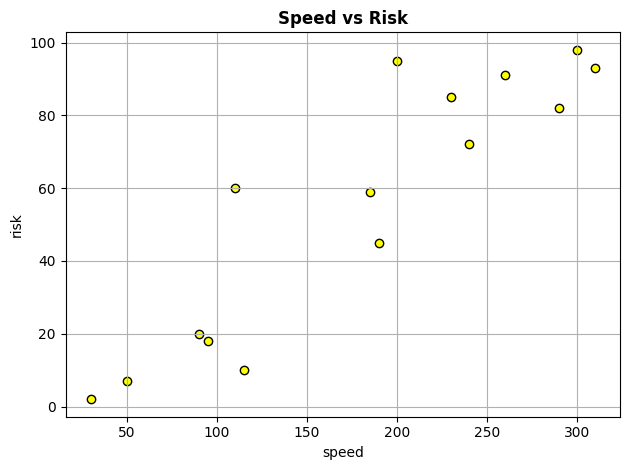

In [20]:
plt.scatter(df['speed'], df['risk'], color='yellow', edgecolors='black' )

plt.xlabel('speed')
plt.ylabel('risk')
plt.title('Speed vs Risk',fontweight='bold')
plt.grid()
plt.tight_layout()

In [7]:
x= df.drop('risk', axis=1)
x.head()

,speed
0,200
1,90
2,300
3,110
4,240


In [8]:
y= df[['risk']]
y.head()

,risk
0,95
1,20
2,98
3,60
4,72


**Linear Regression**

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [10]:
x.mean()

speed    179.666667
dtype: float64

In [11]:
y.mean()

risk    55.8
dtype: float64

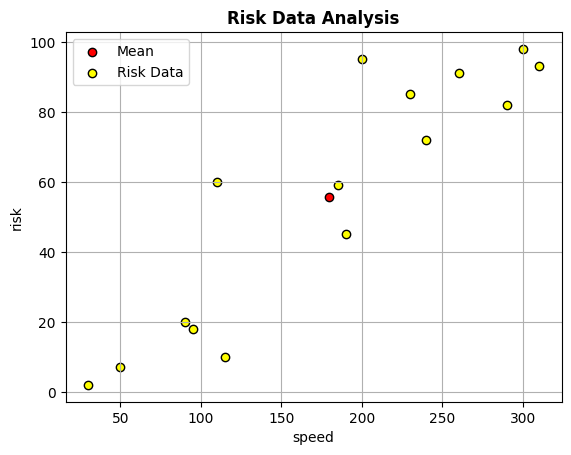

In [22]:
plt.scatter(x.mean(), y.mean(), color='red', edgecolors= 'black', label='Mean')
plt.scatter(df['speed'], df['risk'], color='yellow', edgecolors='black', label='Risk Data' )

plt.xlabel('speed')
plt.ylabel('risk')
plt.title('Risk Data Analysis',fontweight='bold')
plt.grid()
plt.legend()

In [13]:
reg.fit(x,y)

LinearRegression()

In [14]:
m=reg.coef_
m

array([[0.35131645]])

In [15]:
c=reg.intercept_
c

array([-7.31985478])

In [23]:
m*11+c

array([[-3.45537387]])

In [16]:
df['Predicted_y']= reg.predict(x)
df.head()

,speed,risk,Predicted_y
0,200,95,62.943434
1,90,20,24.298625
2,300,98,98.075079
3,110,60,31.324954
4,240,72,76.996092


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


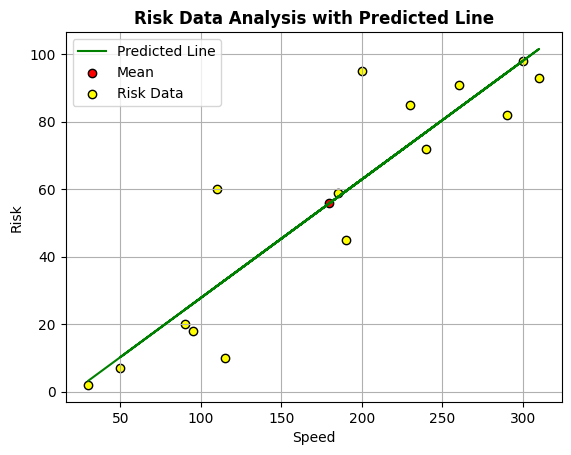

In [24]:
plt.plot(x, reg.predict(x), color= 'green', label= 'Predicted Line')
plt.scatter(x.mean(), y.mean(), color='red', edgecolors= 'black', label='Mean')
plt.scatter(df['speed'], df['risk'], color='yellow', edgecolors='black', label='Risk Data' )

plt.xlabel('Speed')
plt.ylabel('Risk')
plt.title('Risk Data Analysis with Predicted Line',fontweight='bold')
plt.grid()
plt.legend()

**Lose and Cost**

In [18]:
df['lose']=df['risk'] - df['Predicted_y']
df.head()

,speed,risk,Predicted_y,lose
0,200,95,62.943434,32.056566
1,90,20,24.298625,-4.298625
2,300,98,98.075079,-0.075079
3,110,60,31.324954,28.675046
4,240,72,76.996092,-4.996092


**Model Accuracy**

In [19]:
reg.score(x,y)

0.8260542394120296

Performance = 82.605%